## Set Up

In [7]:
# autoreload
%load_ext autoreload
%autoreload 2
# jupyter black formatter
%load_ext jupyter_black

import subprocess
import os
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "pirnns"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
Working directory:  /home/facosta/pirnns/pirnns
Directory added to path:  /home/facosta/pirnns
Directory added to path:  /home/facosta/pirnns/pirnns


## Load Models from Sweep

In [8]:
from pirnns.analysis.load_models import load_experiment_sweep
import torch

sweep_dir = (
    "/home/facosta/pirnns/pirnns/logs/experiments/timescales_sweep_20251002_064332"
)

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

Loading 6 experiments with 4 seeds each...
Total models to load: 24
Using Lightning checkpoints

Loading experiment: discrete_single_05
  ✓ Loaded discrete_single_05/seed_0
  ✓ Loaded discrete_single_05/seed_1
  ✓ Loaded discrete_single_05/seed_2
  ✓ Loaded discrete_single_05/seed_3
Loading experiment: discrete_single_075
  ✓ Loaded discrete_single_075/seed_0
  ✓ Loaded discrete_single_075/seed_1
  ✓ Loaded discrete_single_075/seed_2
  ✓ Loaded discrete_single_075/seed_3
Loading experiment: discrete_single_1
  ✓ Loaded discrete_single_1/seed_0
  ✓ Loaded discrete_single_1/seed_1
  ✓ Loaded discrete_single_1/seed_2
  ✓ Loaded discrete_single_1/seed_3
Loading experiment: discrete_two
  ✓ Loaded discrete_two/seed_0
  ✓ Loaded discrete_two/seed_1
  ✓ Loaded discrete_two/seed_2
  ✓ Loaded discrete_two/seed_3
Loading experiment: discrete_four
  ✓ Loaded discrete_four/seed_0
  ✓ Loaded discrete_four/seed_1
  ✓ Loaded discrete_four/seed_2
  ✓ Loaded discrete_four/seed_3
Loading experiment: con

## Plot Training Metrics

In [9]:
from pirnns.analysis.plotting import plot_training_curves_sweep

### Training Loss

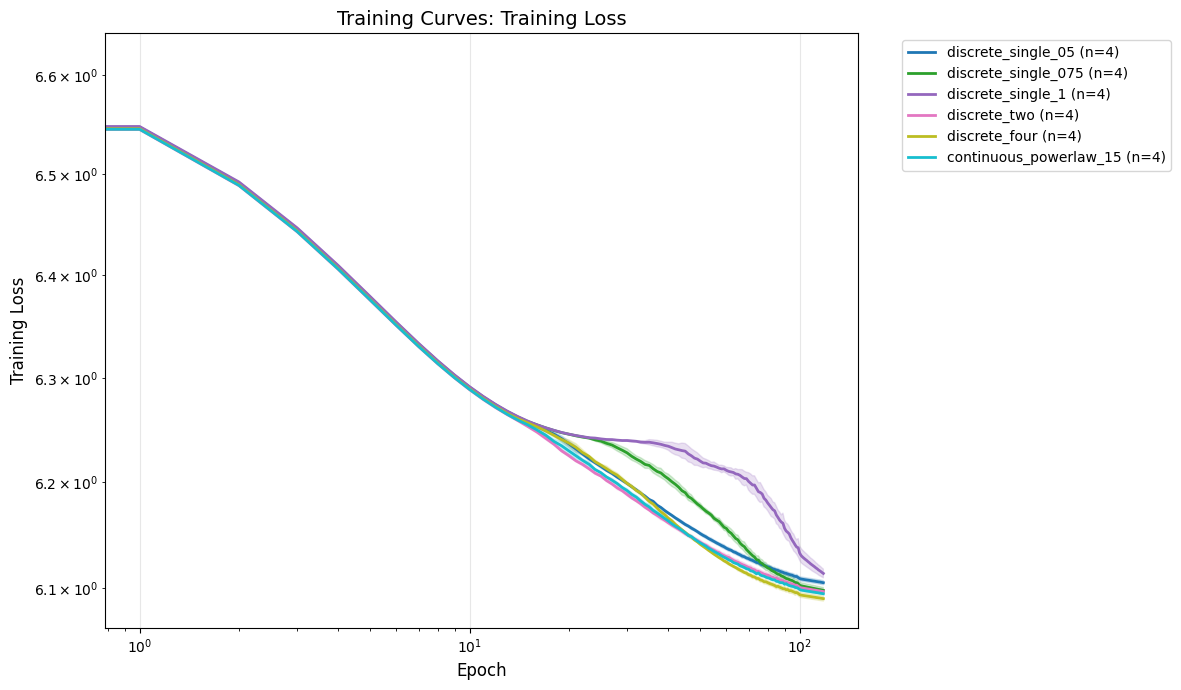

In [10]:
plot_training_curves_sweep(models, metric="train_loss", log_x=True, log_y=True)

### Validation Loss

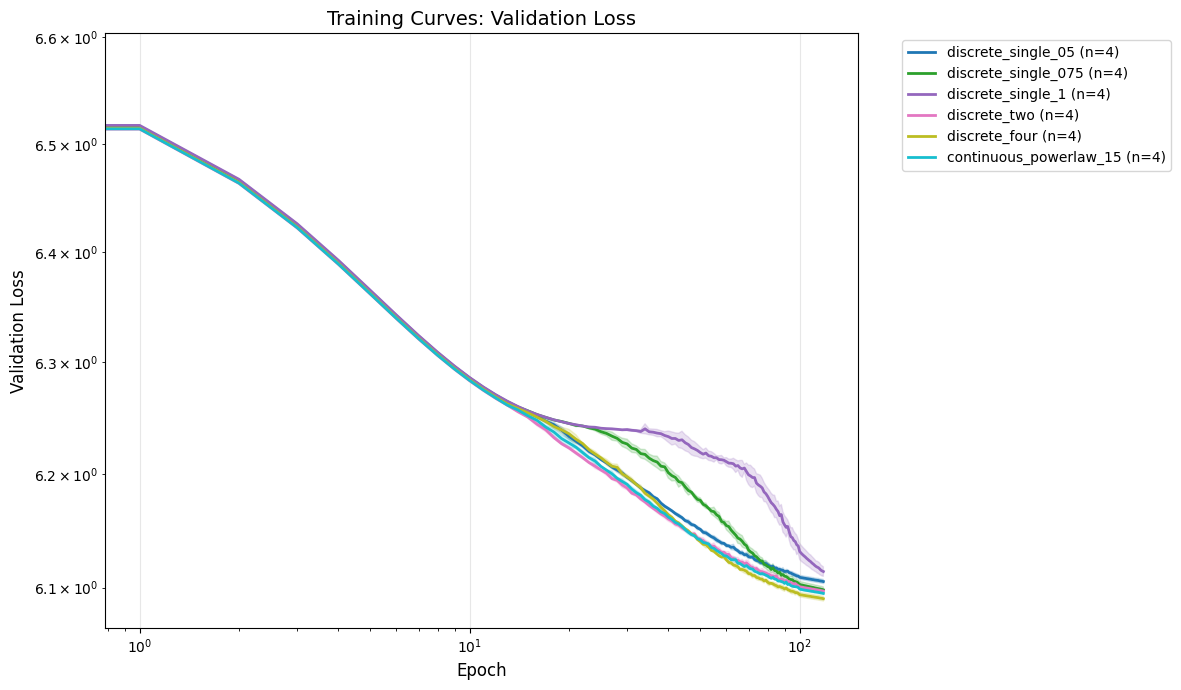

In [11]:
plot_training_curves_sweep(models, metric="val_loss", log_x=True, log_y=True)

### Decoding Error

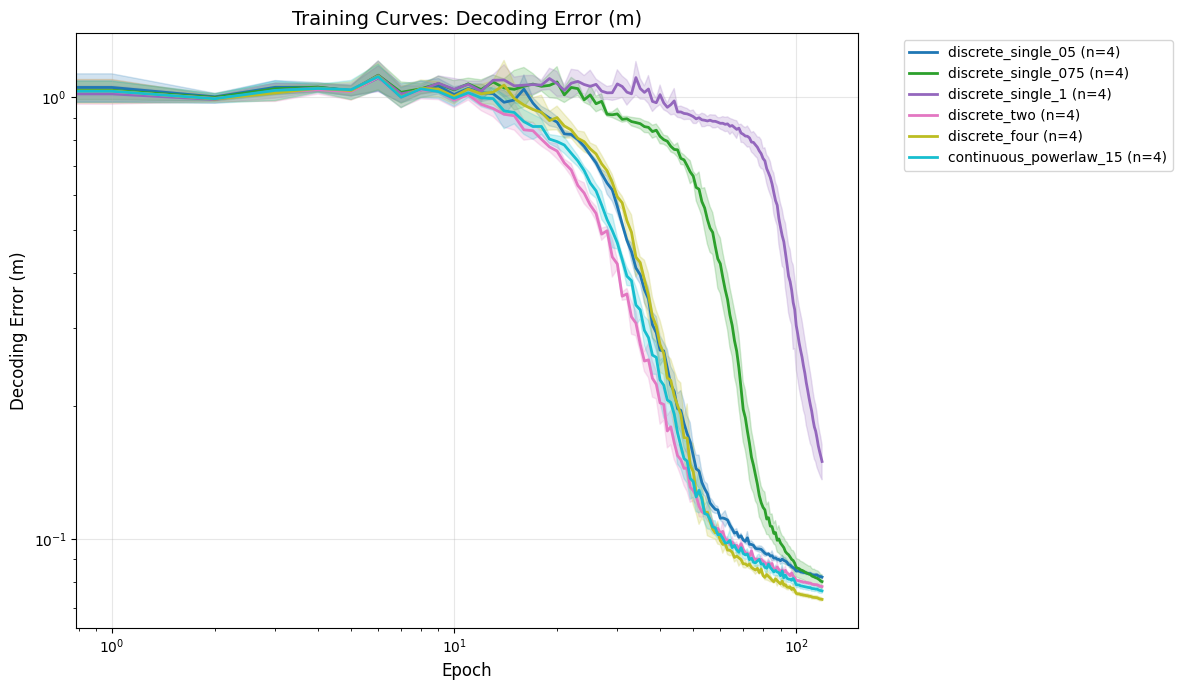

In [12]:
plot_training_curves_sweep(models, metric="decoding_error", log_x=True, log_y=True)